# **Cracking SpaceShip Titanic**
- Welcome to the year *2912*, where your data science skills are needed to solve a **cosmic mystery**. We've received a transmission from four lightyears away and things aren't looking good.
- The **Spaceship Titanic** was an `interstellar` passenger `liner` launched a month ago. With almost `13,000` passengers on board, the vessel set out on its maiden voyage *transporting emigrants* from our solar system to three newly habitable **exoplanets** orbiting nearby stars.
- While rounding `Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary` Spaceship Titanic collided with a **spacetime anomaly** hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

<div align="center">
<img src="https://storage.googleapis.com/kaggle-media/competitions/Spaceship%20Titanic/joel-filipe-QwoNAhbmLLo-unsplash.jpg" width=500px></img>
</div>

- To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.
- Help save them and change history!

## Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./spaceship-titanic/train.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df["HomePlanet"].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [6]:
df["Destination"].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [7]:
df["CryoSleep"].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [8]:
df["VIP"].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [9]:
df["Cabin"].value_counts()

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

# Split Training and Testing Set.

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["Transported"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [11]:
strat_train_set.count()

PassengerId     6954
HomePlanet      6785
CryoSleep       6786
Cabin           6793
Destination     6801
Age             6815
VIP             6796
RoomService     6809
FoodCourt       6800
ShoppingMall    6785
Spa             6804
VRDeck          6810
Name            6795
Transported     6954
dtype: int64

In [12]:
strat_test_set.count()

PassengerId     1739
HomePlanet      1707
CryoSleep       1690
Cabin           1701
Destination     1710
Age             1699
VIP             1694
RoomService     1703
FoodCourt       1710
ShoppingMall    1700
Spa             1706
VRDeck          1695
Name            1698
Transported     1739
dtype: int64

In [13]:
X = strat_train_set.drop("Transported", axis=1)
X.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
3600,3868_04,Earth,False,G/630/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Harrie Braymon
1262,1336_01,Earth,True,G/201/S,TRAPPIST-1e,17.0,False,0.0,0.0,0.0,0.0,0.0,NaN
8612,9193_01,Earth,NaN,G/1483/S,PSO J318.5-22,35.0,False,0.0,0.0,0.0,0.0,0.0,Camily Howence
5075,5422_01,Europa,True,D/164/S,55 Cancri e,26.0,False,0.0,0.0,0.0,NaN,0.0,Pleion Sperap
4758,5076_01,Earth,False,G/818/P,TRAPPIST-1e,13.0,False,0.0,0.0,60.0,1.0,5147.0,Alicey Wolferguson


In [14]:
y = strat_train_set["Transported"]
y.head()

3600     True
1262     True
8612    False
5075     True
4758    False
Name: Transported, dtype: bool

## Get Rid of Unnecessay Features
As we know that some of the Features in a dataset are not suitable for some Specific Purpose i.e there `Name` and `PassengerId`.

In [15]:
X = X.drop(["Name", "PassengerId", "FoodCourt", "ShoppingMall"], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6954 entries, 3600 to 7925
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   6785 non-null   object 
 1   CryoSleep    6786 non-null   object 
 2   Cabin        6793 non-null   object 
 3   Destination  6801 non-null   object 
 4   Age          6815 non-null   float64
 5   VIP          6796 non-null   object 
 6   RoomService  6809 non-null   float64
 7   Spa          6804 non-null   float64
 8   VRDeck       6810 non-null   float64
dtypes: float64(4), object(5)
memory usage: 543.3+ KB


# Deal with Numerical Values
- As we know that most of the Machine Learning Algorithms can only work with Numerical Values.
- So for that Need we are Going to Deal with these Numerical Values i.e
    - Use `OneHotEncoder` on `HomePlanet`, `CryoSleep`, `Cabin`, `Destination` and `VIP`.

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"]
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), columns_to_encode)
    ]
)
X_encoded = preprocessor.fit_transform(X)
X_encoded

<6954x5450 sparse matrix of type '<class 'numpy.float64'>'
	with 34770 stored elements in Compressed Sparse Row format>

In [17]:
from scipy.sparse import csr_matrix
X = pd.DataFrame.sparse.from_spmatrix(X_encoded)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,5440,5441,5442,5443,5444,5445,5446,5447,5448,5449
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([1, 1, 0, ..., 1, 1, 1])

# Correlation Matrix

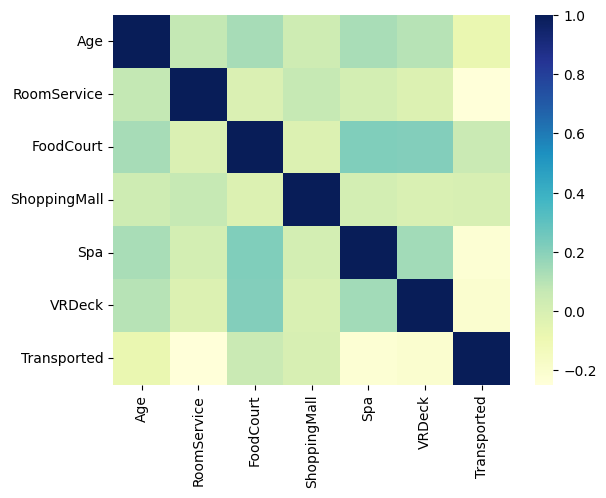

In [19]:
import seaborn as sns
df_updated = strat_train_set.copy()
df_updated["Transported"] = y_encoded
numeric_columns = df_updated.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, cmap="YlGnBu")
plt.show()

In [20]:
correlation_matrix

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.071221,0.134895,0.037472,0.130959,0.101356,-0.079660
RoomService,0.071221,1.000000,-0.011741,0.065927,0.016150,-0.024035,-0.248558
FoodCourt,0.134895,-0.011741,1.000000,-0.023691,0.217420,0.210287,0.049405
ShoppingMall,0.037472,0.065927,-0.023691,1.000000,0.017725,-0.005764,-0.001678
Spa,0.130959,0.016150,0.217420,0.017725,1.000000,0.146190,-0.220299
VRDeck,0.101356,-0.024035,0.210287,-0.005764,0.146190,1.000000,-0.206128
Transported,-0.079660,-0.248558,0.049405,-0.001678,-0.220299,-0.206128,1.000000
